In [33]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import csv
import seeg_library as slib
import seeg_constants as CONST
import seaborn as sns

In [34]:
# Constants
patient = 'p13'
analysisType = "behavior"  # On what even to align stroop tasks. Choose "start" (trial start), "stim" (stimulus onset), or "key" (keypress)

In [35]:
csv_path = "behavior/" +  patient + "_ssrt_" + analysisType + "_run"

In [36]:
#Combine runs
df_lst = []
for i in range (3):
    print(i)
    experiment = str(i+1) 
    path_csv = csv_path + experiment + ".csv"
    df = pd.read_csv(path_csv)
    df_lst.append(df)
combined_df = pd.concat(df_lst, ignore_index=True)
combined_df.to_csv('combined_ssrt_behavior.csv', index=False)

0
1
2


# Visualization

In [37]:
#String-to-float conversion method
def time_string_to_seconds(time_str):
    if time_str.count(':') == 2:
        # Format HH:MM:SS.SSSS
        h, m, s = map(float, time_str.split(':'))
        return h * 3600 + m * 60 + s
    elif time_str.count(':') == 1:
        # Format MM:SS.S
        m, s = map(float, time_str.split(':'))
        return m * 60 + s
    else:
        raise ValueError("Time format not recognized")

In [38]:
#Adding reaction times column to dataframe
combined_df['stim_time_seconds'] = combined_df['stim_time'].apply(time_string_to_seconds)
combined_df['stim_time_seconds'] = combined_df['stim_time_seconds'].astype('float64')
combined_df['key_time_seconds'] = combined_df['rxn_time'].apply(time_string_to_seconds)
combined_df['key_time_seconds'] = combined_df['key_time_seconds'].astype('float64')

combined_df['reaction_time'] = combined_df['key_time_seconds'] - combined_df['stim_time_seconds']
combined_df['reaction_time'] = combined_df['reaction_time'].astype('float64')

In [39]:
stop_idx = np.where(combined_df['stop_signal'] == 1)
go_idx = np.where(combined_df['stop_signal'] == 0)

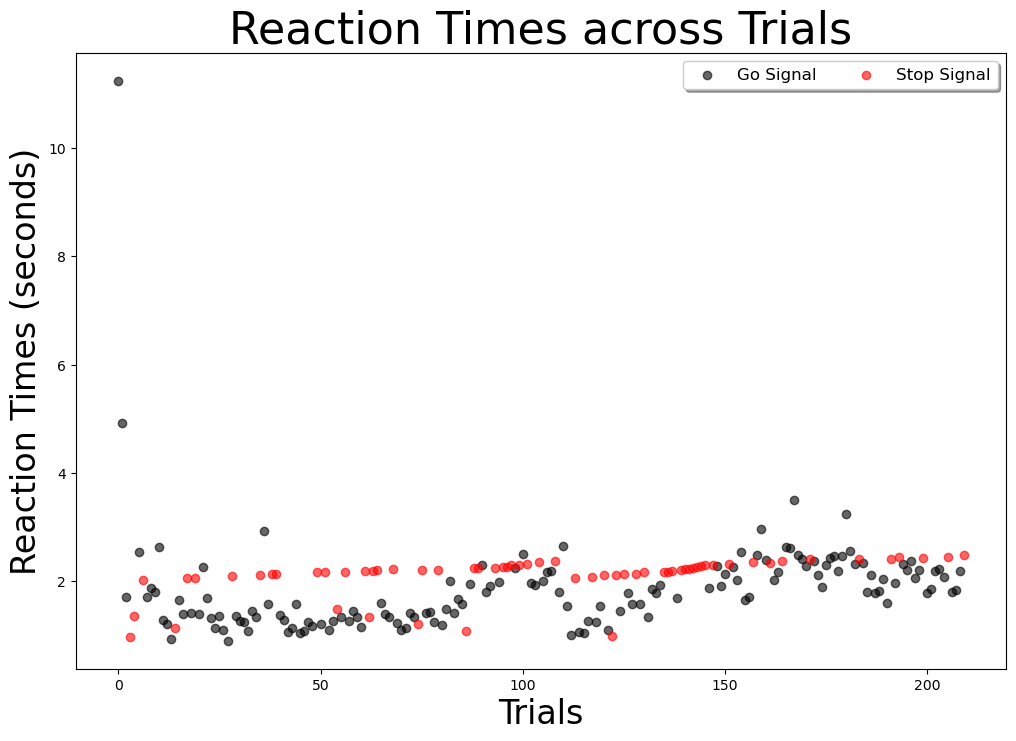

In [63]:
# Create a color map
colors = {0: 'black', 1: 'red'}

# Create a plot
plt.figure(figsize=(12, 8))

# Plot the points with colors based on the stop_signal
for stop_signal in combined_df['stop_signal'].unique():
    subset = combined_df[combined_df['stop_signal'] == stop_signal]
    plt.scatter(subset.index, subset['reaction_time'],
                c=colors[stop_signal],
                alpha=0.6,
                label=f'Stop Signal {stop_signal}')

# Add labels and title
plt.xlabel('Trials', fontsize = 24)
plt.ylabel('Reaction Times (seconds)', fontsize = 24)
plt.title('Reaction Times across Trials', fontsize = 32)

# Customize the legend with specific labels
plt.legend(
    loc='best',          # Automatically find the best location
    fontsize='large',    # Set the font size
    frameon=True,        # Show the frame
    shadow=True,         # Add a shadow to the legend
    ncol=2,              # Two columns in the legend
    labels=['Go Signal', 'Stop Signal']  # Custom labels
)

# Show the plot
plt.show()

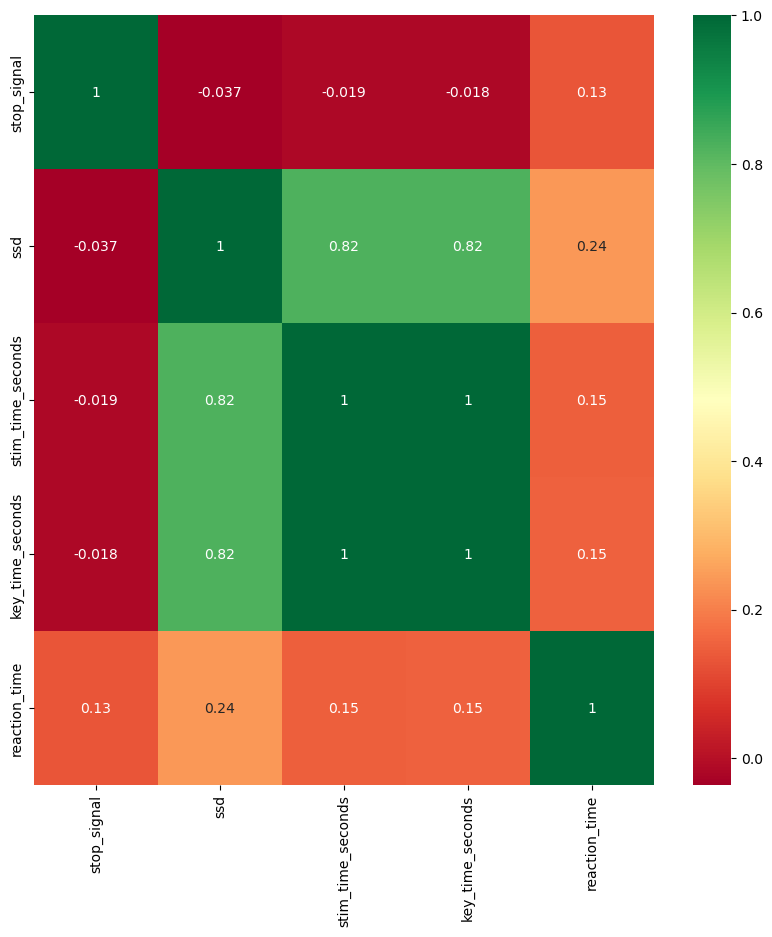

In [41]:
#Correlation Analysis/Relationships between variables using seaborn library
corrmat = combined_df.corr(numeric_only=True)
top_corr_features = corrmat.index
plt.figure(figsize = (10, 10))
#plot heat map
g=sns.heatmap(combined_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

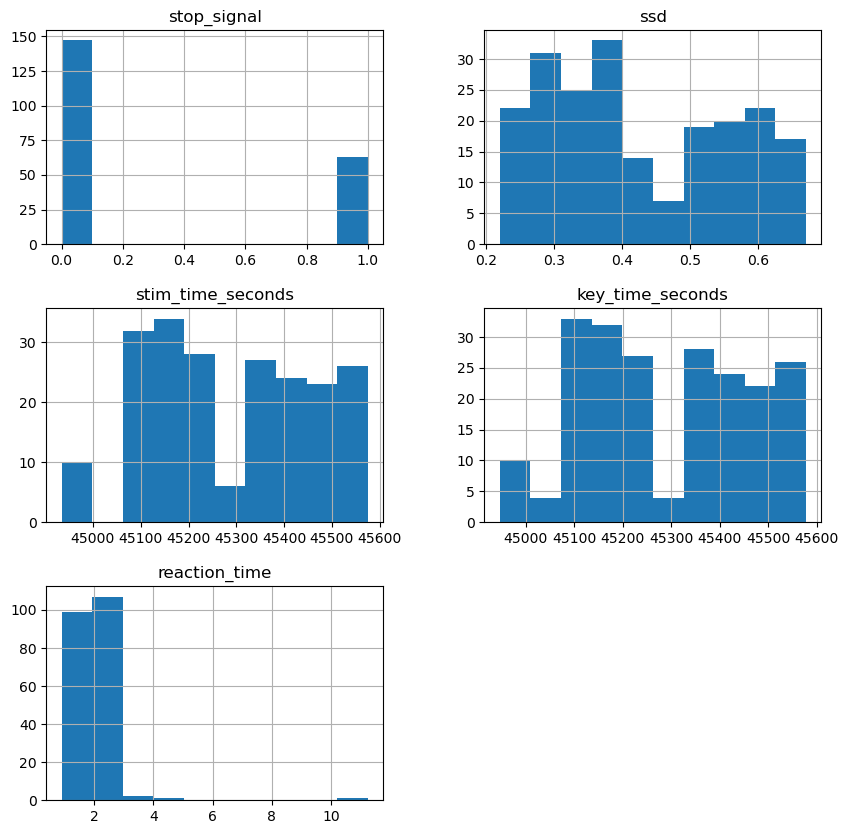

In [42]:
combined_df.hist(bins=10, figsize=(10, 10))
plt.show()